In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kandrian
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | angola
Processing Record 4 of Set 1 | blackwater
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | la ronge
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | andra
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | uniontown
Processing Record 2

Processing Record 37 of Set 4 | lubbock
Processing Record 38 of Set 4 | filadelfia
Processing Record 39 of Set 4 | semey
Processing Record 40 of Set 4 | meulaboh
Processing Record 41 of Set 4 | amapa
Processing Record 42 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | menfi
Processing Record 46 of Set 4 | talcahuano
Processing Record 47 of Set 4 | yakeshi
Processing Record 48 of Set 4 | labrea
Processing Record 49 of Set 4 | faanui
Processing Record 50 of Set 4 | port hardy
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | kismayo
Processing Record 3 of Set 5 | sechura
Processing Record 4 of Set 5 | bardiyah
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | slatinany
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | vilcun
Processing Record 9 o

Processing Record 26 of Set 8 | treinta y tres
Processing Record 27 of Set 8 | plouzane
Processing Record 28 of Set 8 | trincomalee
Processing Record 29 of Set 8 | raymond
Processing Record 30 of Set 8 | pauini
Processing Record 31 of Set 8 | tidore
City not found. Skipping...
Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | bulungu
Processing Record 34 of Set 8 | puerto escondido
Processing Record 35 of Set 8 | berdigestyakh
Processing Record 36 of Set 8 | san jose
Processing Record 37 of Set 8 | sekoma
Processing Record 38 of Set 8 | bogorodskoye
Processing Record 39 of Set 8 | grand gaube
Processing Record 40 of Set 8 | athabasca
Processing Record 41 of Set 8 | kpandae
Processing Record 42 of Set 8 | karia
Processing Record 43 of Set 8 | nizwa
Processing Record 44 of Set 8 | tubruq
City not found. Skipping...
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | warrington
Processing Record 48 of 

Processing Record 16 of Set 12 | biak
Processing Record 17 of Set 12 | kazanlak
Processing Record 18 of Set 12 | phan rang
City not found. Skipping...
Processing Record 19 of Set 12 | khomeynishahr
City not found. Skipping...
Processing Record 20 of Set 12 | emerald
Processing Record 21 of Set 12 | guapiacu
Processing Record 22 of Set 12 | sri aman
Processing Record 23 of Set 12 | khandyga
Processing Record 24 of Set 12 | samarai
Processing Record 25 of Set 12 | yongchang
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | ambulu
Processing Record 28 of Set 12 | port moresby
Processing Record 29 of Set 12 | ancud
Processing Record 30 of Set 12 | gboko
Processing Record 31 of Set 12 | manzanillo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

536

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kandrian,-6.2167,149.5500,85.01,69,96,4.61,PG,2022-01-17 23:39:14
1,Bethel,41.3712,-73.4140,35.91,88,100,1.99,US,2022-01-17 23:38:13
2,Angola,-12.5000,18.5000,63.82,89,95,3.49,AO,2022-01-17 23:39:14
3,Blackwater,-23.5833,148.8833,84.24,58,58,11.07,AU,2022-01-17 23:39:15
4,Saint-Philippe,-21.3585,55.7679,78.39,85,88,3.65,RE,2022-01-17 23:39:15
5,Souillac,-20.5167,57.5167,78.37,88,20,2.30,MU,2022-01-17 23:38:16
6,Asau,46.4333,26.4000,33.76,60,63,10.47,RO,2022-01-17 23:39:16
7,Avarua,-21.2078,-159.7750,82.45,78,75,20.71,CK,2022-01-17 23:35:37
8,Georgetown,5.4112,100.3354,80.53,66,20,10.00,MY,2022-01-17 23:39:16
9,La Ronge,55.1001,-105.2842,-3.75,77,100,12.66,CA,2022-01-17 23:39:17


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kandrian,PG,2022-01-17 23:39:14,-6.2167,149.5500,85.01,69,96,4.61
1,Bethel,US,2022-01-17 23:38:13,41.3712,-73.4140,35.91,88,100,1.99
2,Angola,AO,2022-01-17 23:39:14,-12.5000,18.5000,63.82,89,95,3.49
3,Blackwater,AU,2022-01-17 23:39:15,-23.5833,148.8833,84.24,58,58,11.07
4,Saint-Philippe,RE,2022-01-17 23:39:15,-21.3585,55.7679,78.39,85,88,3.65
5,Souillac,MU,2022-01-17 23:38:16,-20.5167,57.5167,78.37,88,20,2.30
6,Asau,RO,2022-01-17 23:39:16,46.4333,26.4000,33.76,60,63,10.47
7,Avarua,CK,2022-01-17 23:35:37,-21.2078,-159.7750,82.45,78,75,20.71
8,Georgetown,MY,2022-01-17 23:39:16,5.4112,100.3354,80.53,66,20,10.00
9,La Ronge,CA,2022-01-17 23:39:17,55.1001,-105.2842,-3.75,77,100,12.66


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

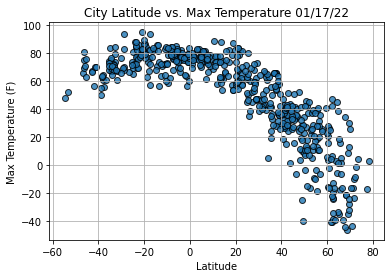

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

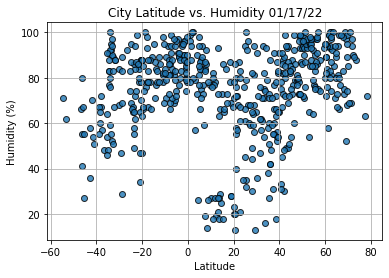

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

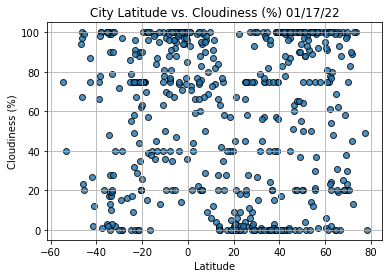

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

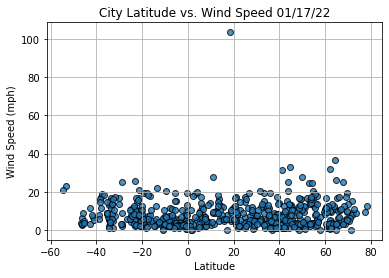

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bethel,US,2022-01-17 23:38:13,41.3712,-73.4140,35.91,88,100,1.99
6,Asau,RO,2022-01-17 23:39:16,46.4333,26.4000,33.76,60,63,10.47
8,Georgetown,MY,2022-01-17 23:39:16,5.4112,100.3354,80.53,66,20,10.00
9,La Ronge,CA,2022-01-17 23:39:17,55.1001,-105.2842,-3.75,77,100,12.66
12,Andra,RU,2022-01-17 23:39:18,62.5147,65.8878,-13.09,100,54,4.83


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

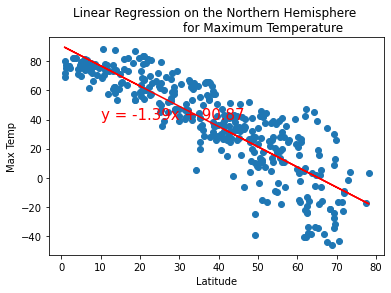

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(10,40))

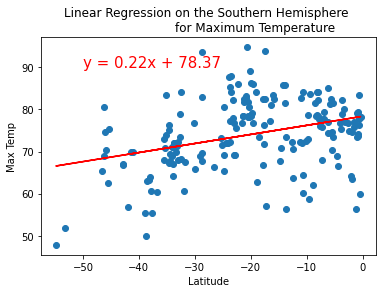

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

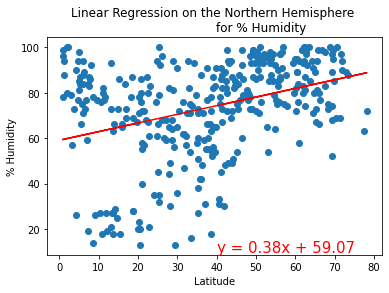

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

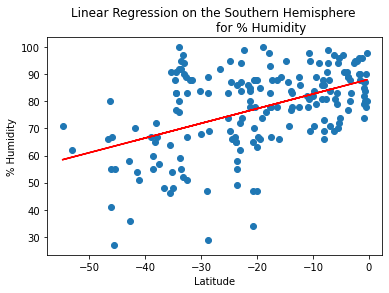

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

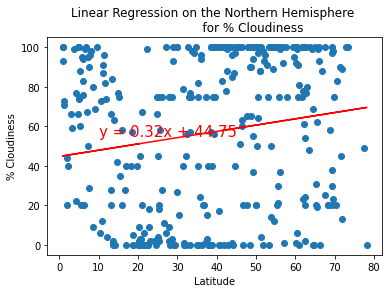

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n\
                    for % Cloudiness', '% Cloudiness',(10,55))

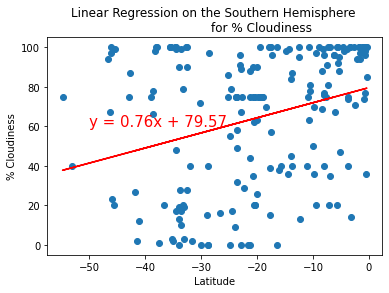

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

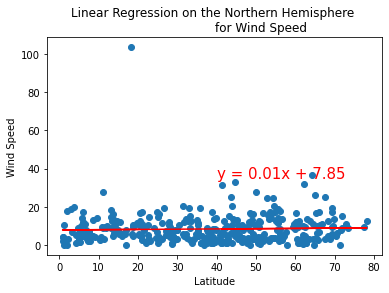

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

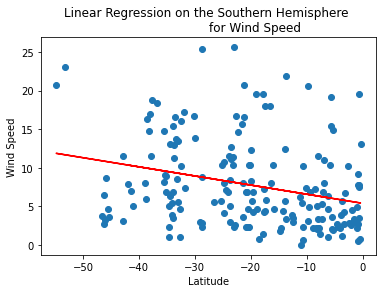

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,35))